<a href="https://colab.research.google.com/github/vjbarayuga/Week9-Unsupervised_ML_Clustering/blob/main/ClusteringMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparation of the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
import sklearn
from sklearn.impute import SimpleImputer #Import SimpleImputer class from sklearn.impute
from termcolor import colored as cl # text customization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

df = pd.read_csv('/content/drive/MyDrive/Coding_DOJO-Data_Science_Bootcamp/04_AdvancedML/DATASET/cust_seg.csv')

df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [5]:
# get column names
column_names = df.columns

# for each attributes (columns), print value counts
for column_name in  column_names:
    print(df[column_name].value_counts())

849    1
291    1
289    1
288    1
287    1
      ..
563    1
562    1
561    1
560    1
0      1
Name: Unnamed: 0, Length: 850, dtype: int64
850    1
292    1
290    1
289    1
288    1
      ..
564    1
563    1
562    1
561    1
1      1
Name: Customer Id, Length: 850, dtype: int64
29    51
31    42
39    41
35    40
28    38
34    38
41    36
27    33
36    33
40    32
33    31
37    31
24    30
26    30
30    30
32    30
38    30
25    25
43    22
47    22
23    21
45    21
48    19
46    18
42    16
44    15
22    14
21    12
50    11
52     9
51     7
53     7
49     5
54     4
56     2
55     2
20     2
Name: Age, dtype: int64
1    460
2    235
3    101
4     49
5      5
Name: Edu, dtype: int64
0     72
1     59
4     57
6     53
9     52
2     50
3     50
5     49
7     45
12    38
8     38
10    38
16    33
11    32
13    32
15    23
18    22
19    17
14    16
17    14
22    13
21    10
20     7
23     6
24     5
25     4
31     3
27     3
30     3
29     2
33     2
26     1

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,850.0,424.500000,245.518160,0.000,212.25000,424.500,636.75000,849.000
Customer Id,850.0,425.500000,245.518160,1.000,213.25000,425.500,637.75000,850.000
Age,850.0,35.029412,8.041432,20.000,29.00000,34.000,41.00000,56.000
Edu,850.0,1.710588,0.927784,1.000,1.00000,1.000,2.00000,5.000
Years Employed,850.0,8.565882,6.777884,0.000,3.00000,7.000,13.00000,33.000
Income,850.0,46.675294,38.543054,13.000,24.00000,35.000,55.75000,446.000
Card Debt,850.0,1.576820,2.125843,0.012,0.38250,0.885,1.89850,20.561
Other Debt,850.0,3.078773,3.398799,0.046,1.04575,2.003,3.90325,35.197
Defaulted,700.0,0.261429,0.439727,0.000,0.00000,0.000,1.00000,1.000
DebtIncomeRatio,850.0,10.171647,6.719441,0.100,5.10000,8.700,13.80000,41.300


# Check Duplicate Value in the dataset

In [7]:
df.columns

Index(['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.duplicated(keep=False).sum()

0

In [10]:
# print the duplicate dataset
df.loc[df.duplicated(keep=False)]

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio


In [11]:
# keep : {'first', 'last', False}, default 'first'
# Drop duplicates except for the first occurrence.

#df = df.drop_duplicates(keep='first', inplace=True)
#df

# Check In-consistent Values

In [12]:
df.columns

Index(['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [13]:
df['Age'].unique()

array([41, 47, 33, 29, 40, 38, 42, 26, 44, 34, 24, 46, 28, 43, 36, 45, 37,
       23, 35, 22, 39, 20, 48, 30, 56, 32, 27, 50, 31, 25, 49, 53, 52, 21,
       51, 55, 54])

In [14]:
df['Years Employed'].unique()

array([ 6, 26, 10,  4, 31, 23,  0,  5,  8,  9,  7,  2,  1, 18, 16, 19, 13,
       12, 17,  3, 22, 11, 21, 20, 14, 24, 15, 29, 27, 25, 30, 28, 33])

In [15]:
df['Income'].unique()

array([ 19, 100,  57, 253,  81,  56,  64,  18, 115,  88,  40,  30,  20,
        16,  17,  26,  61,  32,  25,  43,  47,  77, 123,  66,  21,  38,
        59,  45,  55,  42,  28,  37, 126,  14, 113,  34, 177,  27,  84,
        33,  70,  36,  60,  67,  74,  44,  79,  23,  75,  98, 145,  68,
        65, 157,  51,  15,  31,  49,  48,  22,  50,  54,  82,  53,  39,
        46,  63,  72,  29,  86,  35,  41,  58, 101,  24,  89, 129,  73,
       221, 242,  95,  78, 116, 102,  52,  83, 169,  69,  13,  92, 150,
       120,  91,  62,  94, 105, 136, 186, 144, 132,  97,  71, 249, 166,
       176,  96, 108, 107, 446,  93,  99, 266, 159, 254, 220, 140, 110,
        80, 190,  76, 138, 114, 234, 121, 118, 135, 148, 139, 324])

In [16]:
df['Card Debt'].unique()

array([1.2400e-01, 4.5820e+00, 6.1110e+00, 6.8100e-01, 9.3080e+00,
       9.9800e-01, 4.4200e-01, 2.7900e-01, 5.7500e-01, 6.5300e-01,
       2.8500e-01, 3.7400e-01, 5.2600e-01, 1.4150e+00, 2.3300e-01,
       1.8500e-01, 1.3200e-01, 1.5190e+00, 2.8060e+00, 5.4400e-01,
       5.8500e-01, 9.6100e-01, 5.5740e+00, 2.3030e+00, 3.0220e+00,
       2.3410e+00, 9.9000e-02, 2.5910e+00, 4.0800e-01, 1.1180e+00,
       1.4850e+00, 2.5330e+00, 1.0190e+00, 1.2630e+00, 1.8540e+00,
       1.0290e+00, 5.8100e-01, 1.5840e+00, 2.7000e-01, 1.4050e+00,
       2.0100e-01, 3.3760e+00, 3.0990e+00, 8.8800e-01, 1.4030e+00,
       1.2760e+00, 2.2500e-01, 2.2900e-01, 2.6100e-01, 7.9800e-01,
       1.5060e+00, 1.2660e+00, 1.3580e+00, 8.4700e-01, 3.1760e+00,
       5.7300e-01, 3.1500e-01, 7.2200e-01, 7.9000e-01, 8.3500e-01,
       2.4500e+00, 2.1000e+00, 5.2450e+00, 4.5220e+00, 3.2400e-01,
       1.7210e+00, 1.7350e+00, 2.4720e+00, 8.3200e-01, 8.3800e-01,
       5.5000e-01, 8.8500e-01, 2.9350e+00, 3.3660e+00, 6.9400e

In [17]:
df['Other Debt'].unique()

array([ 1.073,  8.218,  5.802,  0.516,  8.908,  7.831,  0.454,  3.945,
        2.215,  3.947,  5.083,  0.266,  0.643,  3.865,  1.647,  1.287,
        0.293,  1.237,  3.782,  2.944,  0.465,  4.629,  3.732,  4.165,
       18.257,  3.467,  0.447,  2.539,  1.008,  3.427,  1.015,  5.717,
        0.619,  1.537,  1.611,  2.079,  1.417,  0.738,  0.522,  7.163,
        1.157, 10.184,  4.993,  9.555,  4.348,  9.728,  2.225,  0.506,
        0.518,  2.984,  2.949,  9.459,  3.278,  1.331, 10.754,  2.577,
        0.645,  0.838,  3.434,  0.893,  5.77 ,  3.136,  2.259,  5.394,
        0.416,  1.799,  1.425,  0.363,  2.549,  1.416,  1.158,  0.54 ,
        4.121,  3.144,  0.89 ,  1.337,  0.808,  1.289, 14.453,  2.001,
        5.978, 15.405,  7.036,  2.931,  7.107,  0.424,  1.559,  1.247,
        1.05 ,  5.07 ,  1.992,  0.821,  0.248,  3.151,  0.469,  0.187,
        2.119,  0.372,  1.55 ,  0.721,  7.217,  9.649,  2.184,  2.35 ,
        1.818, 11.874,  0.856,  2.869,  1.5  ,  1.391,  1.133,  3.492,
      

In [18]:
df['Defaulted'].unique()

array([ 0.,  1., nan])

In [19]:
df['DebtIncomeRatio'].unique()

array([ 6.3, 12.8, 20.9,  7.2, 10.9,  1.6,  6.6, 15.5,  4. ,  6.1,  6.5,
       17.6,  9.4,  9.2,  2.5, 10.6, 10.8,  4.2, 13. , 19.8,  8.4, 17.3,
        8.8,  2.6, 13.5,  2.4, 10.1, 15. ,  3.9, 10. ,  7.7,  5.4, 12.9,
        4.4,  6.8,  9.7, 12. , 23.8,  5.9, 21.3, 13.1, 17.5,  3.5,  4.1,
        6.2,  5.5, 32.5, 24.4,  3.3, 19.9, 12.6,  4.8,  6. , 13.7, 15.4,
       11.2, 13.4,  3.7,  8. , 10.5, 14.7, 16.1,  2.8,  1.9,  7.9, 12.2,
       29.7,  9.1,  8.2, 18.4, 18.6,  2.2,  0.9,  1.2, 14.8,  4.7, 25.4,
        9. , 13.2, 30.1,  2.9, 14.4,  3. ,  5.7,  9.5, 16. ,  9.8, 10.7,
        8.1, 18.2, 11.5,  8.3,  5. ,  1.7,  3.4,  4.5, 13.9, 11. , 16.4,
        8.7, 11.8, 25.1, 10.3, 23.4,  9.3, 17.2,  5.6, 17.1, 14.6, 19.2,
        0.8,  2.7, 14.3, 12.3, 28.9,  5.1, 12.4, 25.3, 26.3, 26. ,  7. ,
        8.9,  1.1, 20.3, 24.5,  0.1,  4.6, 13.8,  3.1,  3.6,  1. , 17.8,
       23.3, 12.1,  2.1, 12.5,  5.8,  6.7,  4.9, 14.1, 24.6, 17. , 16.9,
       12.7, 14. , 23. , 11.3,  3.2,  7.1,  6.4,  8

# Check Null Values

In [20]:
df.isnull().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

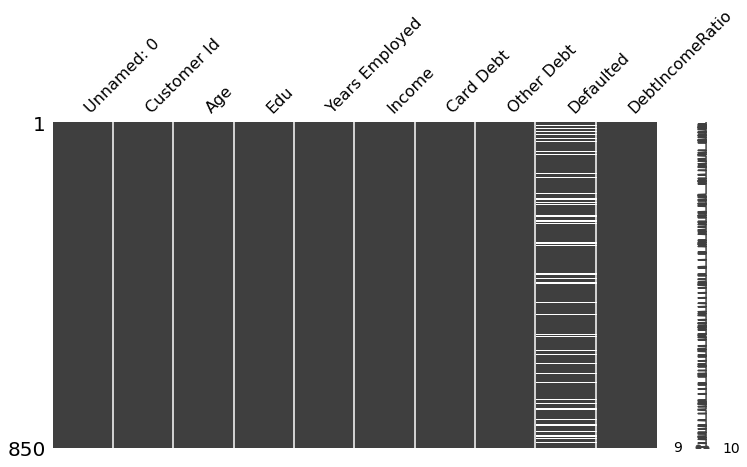

In [21]:
import missingno as msno 
# Visualize missing values as a matrix 
msno.matrix(df,figsize=(12,6)) 

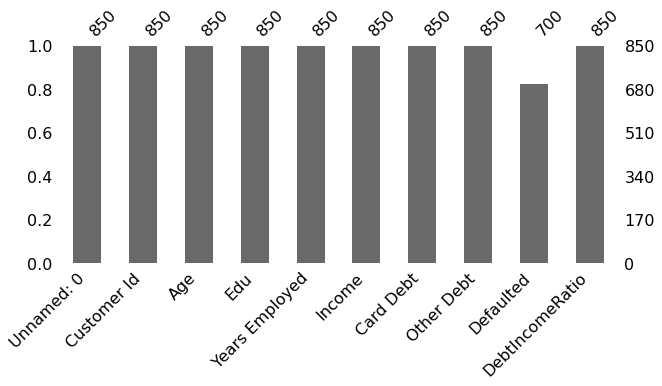

In [22]:
# Visualize the number of missing 
# values as a bar chart 
msno.bar(df,figsize=(10,4)) 

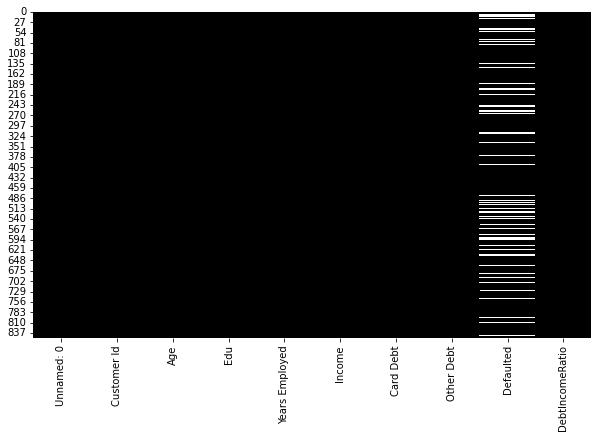

In [23]:
#sns.heatmap(df.isnull(),cmap="viridis")
plt.figure(figsize=(10,6))
sns.heatmap(
    data=df.isnull(),
    cmap=sns.color_palette(['black', 'yellow', 'orange', 'white']),cbar=False)

In [24]:
#df.describe(include=['O'])  ## For categorical

In [25]:
df["Defaulted"].mean()

0.26142857142857145

# Treat the Inconsistent Values and Impute

# REPLACE INCONSISTENT VALUES



In [26]:
# df[""].replace({"OLD": "NEW", "OLD": "NEW", "high": "HIGH"}, inplace=True)
# print(df)

# Treat the Duplicate Values and Replace/Remove

In [27]:
# removes all duplicate rows
# df = df.drop_duplicates(keep=False) # False # --Drop all duplicates.
# df

In [28]:
# changing the dataset by settig inplace  to true
# df.drop_duplicates(keep='first', inplace=True)
# df

# Treat the Missing Values and Impute

In [29]:
## Train Dataset ("Column") column without null
# df = df.dropna()

In [30]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
## Impute NaN value in columns " Defaulted  " with mean value of respected column.
imputer=imputer.fit(df.iloc[:,8:9])
df.iloc[:,8:9]=imputer.transform(df.iloc[:,8:9])

In [31]:
# RECHECK
df.isnull().sum()

Unnamed: 0         0
Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


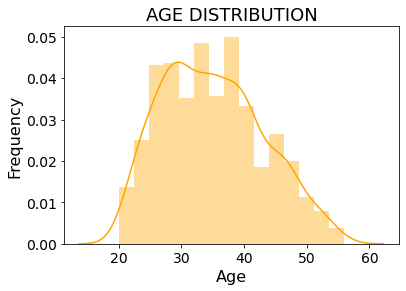

In [32]:
# Age distribution

print(cl(df['Age'].describe(), attrs = ['bold']))

sb.distplot(df['Age'], 
            color = 'orange')
plt.title('AGE DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


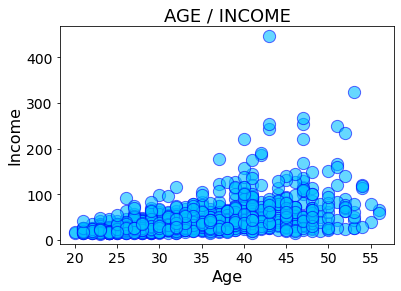

In [33]:
# Age vs Income

sb.scatterplot('Age', 'Income', 
               data = df, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('AGE / INCOME', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_income.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


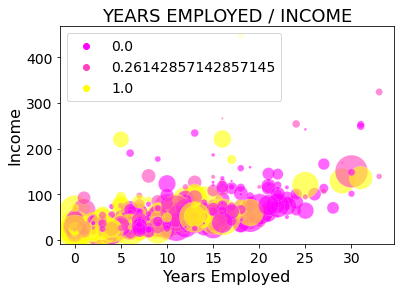

In [34]:
# Years Employed vs Income

area = df.DebtIncomeRatio **2

sb.scatterplot('Years Employed', 'Income', 
               data = df, 
               s = area, 
               alpha = 0.6, 
               edgecolor = 'white', 
               hue = 'Defaulted', 
               palette = 'spring')
plt.title('YEARS EMPLOYED / INCOME', 
          fontsize = 18)
plt.xlabel('Years Employed', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('y_income.png')
plt.show()

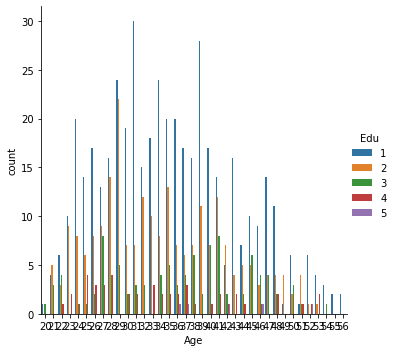

In [35]:
sns.catplot(x='Age',hue="Edu",data=df,kind = "count")

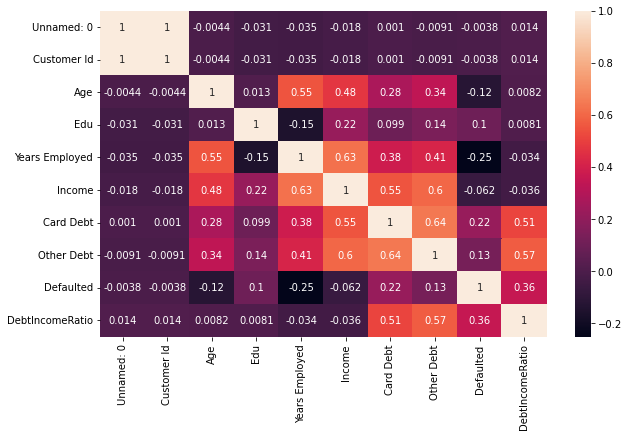

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

# Pre-processing

In [37]:
X = df
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [38]:
from sklearn.compose import make_column_selector

#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
#select the numeric columns of each type
numerical_features = num_selector(df)
categorial_features = cat_selector(df)
#check our lists
print('numeric columns are', numerical_features)
print('categorical columns are', categorial_features)

numeric columns are ['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']
categorical columns are []


# Treat Categorical Values

In [39]:
## Convert "Sex" male=1 and female=0
#df[""].replace(["",""],[1,0],inplace=True)

# map categorical values into numbers
from sklearn.compose import make_column_selector
# for each categorical columns
cat_selector = make_column_selector(dtype_include='object')
cat_data = X[cat_selector(X)]

# for each categorical columns
for c_name in cat_data.columns:
    
    # print the column name
    print(c_name)

    # get unique values from that column
    values_list = df[c_name].unique()

    # initialize the dictionary (mapper)
    col_dictionary = dict()

    # for each value in that column
    for index, value in enumerate(values_list):
        
        # display the index(position) and value
        #print(index, value)

        # add the 'value: index' to the dictionary
        col_dictionary[value] = index

    #print(col_dictionary)

    # replace values in that column
    X[c_name].replace(col_dictionary, inplace=True)

X.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


# Normalization 

In [40]:
# scale values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only
scaler.fit(X)
# Apply transform to both the training set and the test set
X_scaled = scaler.transform(X)

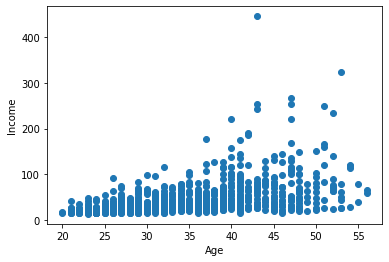

In [41]:
plt.scatter(X['Age'], X['Income'])
plt.xlabel('Age')
plt.ylabel('Income');

# KMEANS

In [42]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [43]:
X['cluster'] = kmeans.labels_
X.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [72]:
# Fit kmeans model with 2 clusters and display the silhouette score
silhouette_score(X_scaled, kmeans.labels_)

0.1850419416307881

# DBSCAN

In [82]:
dbs = DBSCAN(eps = 0.5, min_samples = 3).fit(X_scaled)

In [75]:
X['cluster'] = dbs.labels_
X.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3,-1
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8,-1
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9,-1
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3,-1
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2,-1


In [83]:
# See DBSCAN silhouette score
silhouette_score(X_scaled, dbs.labels_)

-0.37299585853492095

# HIERARCHICAL CLUSTERING

In [85]:
# See Hierarchical clustering silhouette score
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(X_scaled)

AgglomerativeClustering()

In [86]:
X['cluster'] = hc.labels_
X.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [87]:
silhouette_score(X_scaled, hc.labels_)

0.24026823267633338

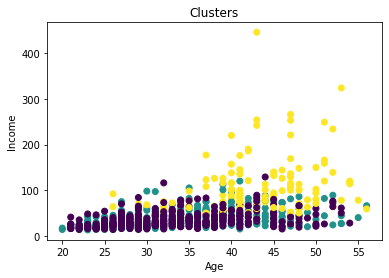

In [44]:
plt.scatter(X['Age'], X['Income'], c = X['cluster'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters');

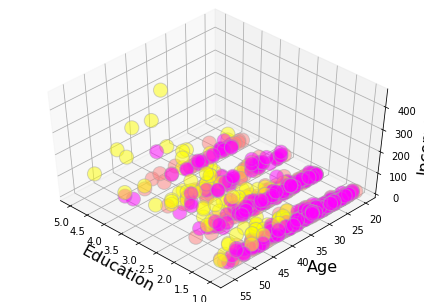

In [45]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(X['Edu'], X['Age'], X['Income'], 
           c = X['cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Education', 
              fontsize = 16)
ax.set_ylabel('Age', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

plt.savefig('3d_plot.png')
plt.show()

.......................................
Number of Default cases are 183
.......................................
Number of Non-Default cases are 517
.......................................
Percentage of Default cases is 35%
.......................................


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


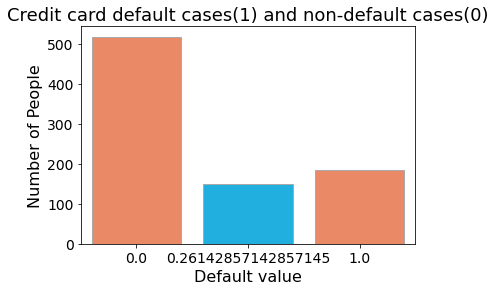

In [88]:
# Credit card default cases

default = df[df['Defaulted'] == 1.0]
non_default = df[df['Defaulted'] == 0.0]

print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Default cases are {}'.format(len(default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Non-Default cases are {}'.format(len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Percentage of Default cases is {:.0%}'.format(len(default)/len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))

sb.countplot(df['Defaulted'], 
             palette = ['coral', 'deepskyblue'], 
             edgecolor = 'darkgrey')
plt.title('Credit card default cases(1) and non-default cases(0)', 
          fontsize = 18)
plt.xlabel('Default value', 
           fontsize = 16)
plt.ylabel('Number of People', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('default_cases.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


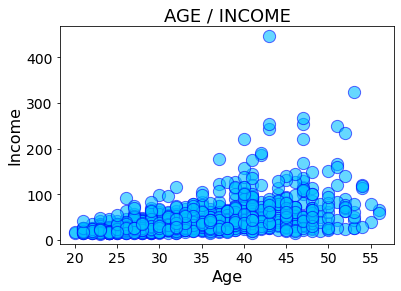

In [89]:
# Age vs Income

sb.scatterplot('Age', 'Income', 
               data = df, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('AGE / INCOME', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_income.png')
plt.show()

The HC clustering algorithm is best since it produced a high score compared to the other clustering algorithm based in the dataset used for the clustered modelling.